# **<font color=#0b5bdb>Convolutional Neural Network - Fashion-MNIST</font>**

![Fashion-MNIST CNN](cnn_img.webp)


## **Dataset Description**

**Fashion-MNIST is a dataset of Zalando's article images, consisting of 70,000 grayscale images in 10 categories. The training set contains 60,000 images and the test set includes 10,000 images. Each example is a 28x28 grayscale image, associated with a label from 10 classes such as T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot. Fashion-MNIST shares the same image size and structure of training and testing splits as the original MNIST dataset, and is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms**

## **Main Objective**

**The main objective of this analysis is to develop a Convolutional Neural Network (CNN) model to accurately classify the images in the Fashion-MNIST dataset into their respective categories. CNNs have proven to be the state-of-the-art technique for image classification tasks.**

**The goal is to achieve an accuracy above 90% on the test set by designing an appropriate CNN architecture and tuning its hyperparameters.** 

**This classification model could be useful for various applications in the fashion industry, such as automated tagging of products in e-commerce, improving search results, and providing personalized product recommendations to customers.** 

**The analysis will involve data exploration, model training with different CNN architectures, model evaluation and comparison, and drawing insights from the results.**

## **Imports**

In [1]:
# Import all necessary libraries for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Data Description with basic Visualization**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**The dataset contains 60,000 grayscale training images and 10,000 test images, each 28x28 pixels, labeled with 10 classes.**

**Let's visualize some sample images:**

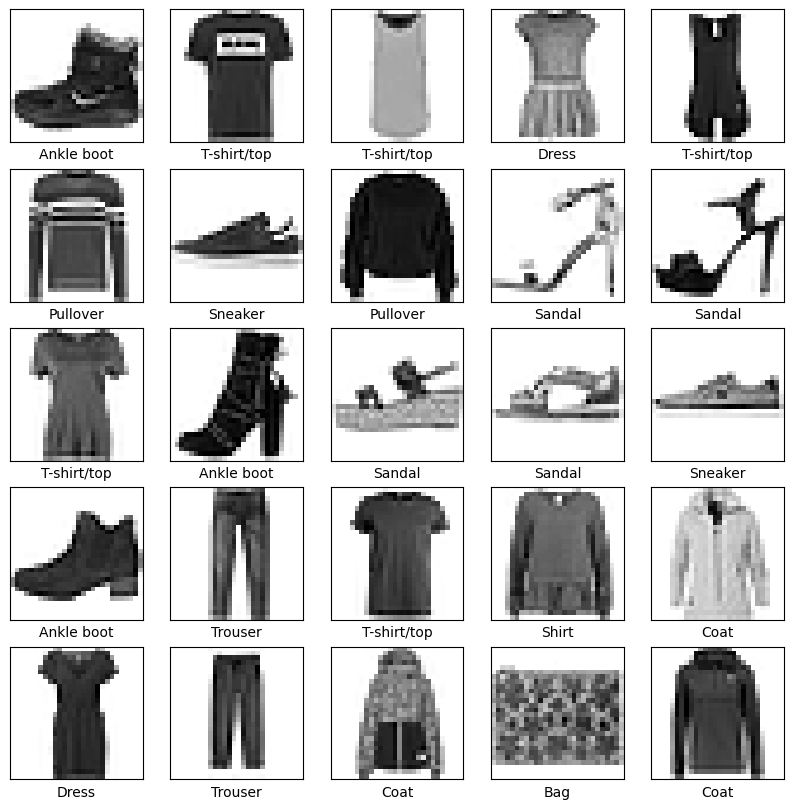

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**We can also check the distribution of classes in the training set:**

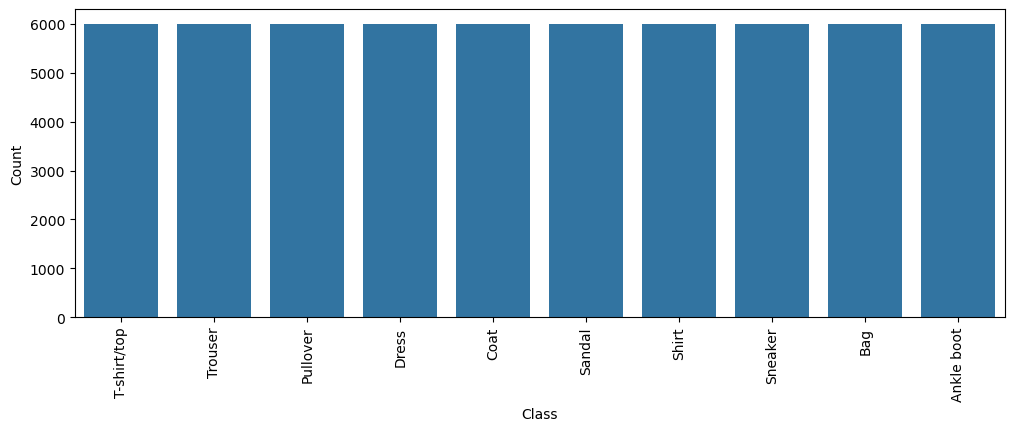

In [5]:
plt.figure(figsize=(12,4))
class_counts = pd.Series(train_labels).value_counts().sort_index()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(range(10), class_names, rotation=90)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**The classes appear to be fairly balanced in the training data.**

## **Feature Engineering**

**In this step, we'll prepare the data for training and testing the Convolutional Neural Network model. This involves reshaping the data and converting it to the appropriate format.
Reshape the data:**

**The images are currently in a 2D array format (28x28). We need to reshape them to include a single color channel, making the shape (28, 28, 1).
We'll also normalize the pixel values to be between 0 and 1 by dividing them by 255.**

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

**Convert labels to categorical: The labels are currently integers ranging from 0 to 9. We'll convert them to categorical format using one-hot encoding.**

In [7]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

**After these steps, our data is ready for training and testing the CNN model.**
- train_images: 60,000 images with shape (28, 28, 1), normalized pixel values.
- train_labels: 60,000 one-hot encoded labels.
- test_images: 10,000 images with shape (28, 28, 1), normalized pixel values.
- test_labels: 10,000 one-hot encoded labels.

**We can verify the shapes and format of the data:**

In [8]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


**Now that our data is prepared, we can proceed to building and training the Convolutional Neural Network model in the next step.**

## **Convolutional Neural Network**

**We'll start by creating a basic version of the CNN model and gradually improve it.**

### **Basic Version**

**The basic version of the model will consist of the following layers:**
- Conv2D layer with 32 filters, 3x3 kernel, and ReLU activation
- MaxPooling2D layer with 2x2 pool size
- Flatten layer to convert the 2D feature maps to a 1D feature vector
- Dense layer with 128 units and ReLU activation
- Output Dense layer with 10 units and softmax activation


In [9]:
# Basic model
basic_model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

basic_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

basic_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10


/opt/homebrew/Caskroom/miniforge/base/envs/mac-ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-22 15:13:03.268292: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-04-22 15:13:03.268313: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-04-22 15:13:03.268317: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-04-22 15:13:03.268336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-22 15:13:03.268349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7714 - loss: 0.6615 - val_accuracy: 0.8728 - val_loss: 0.3439
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8901 - loss: 0.3123 - val_accuracy: 0.8982 - val_loss: 0.2916
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9051 - loss: 0.2689 - val_accuracy: 0.9078 - val_loss: 0.2617
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9185 - loss: 0.2278 - val_accuracy: 0.9062 - val_loss: 0.2622
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9248 - loss: 0.2083 - val_accuracy: 0.9112 - val_loss: 0.2477
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9328 - loss: 0.1866 - val_accuracy: 0.9110 - val_loss: 0.2468
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9389 - loss: 0.1686 - val_accuracy: 0.9132 - val_loss: 0.2410
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9445 - loss: 0.1551 - val_accuracy: 0.9150 - val

**We compile the model with the Adam optimizer, categorical cross-entropy loss, and accuracy metric. We train the model for 10 epochs with a batch size of 128 and use 10% of the training data for validation.**

**Let's evaluate the model on the test set:**

In [10]:
basic_test_loss, basic_test_acc = basic_model.evaluate(test_images, test_labels)
print("Test accuracy:", basic_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9104 - loss: 0.2660
Test accuracy: 0.9120000004768372


**We can also visualize some predictions made by the basic model:**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


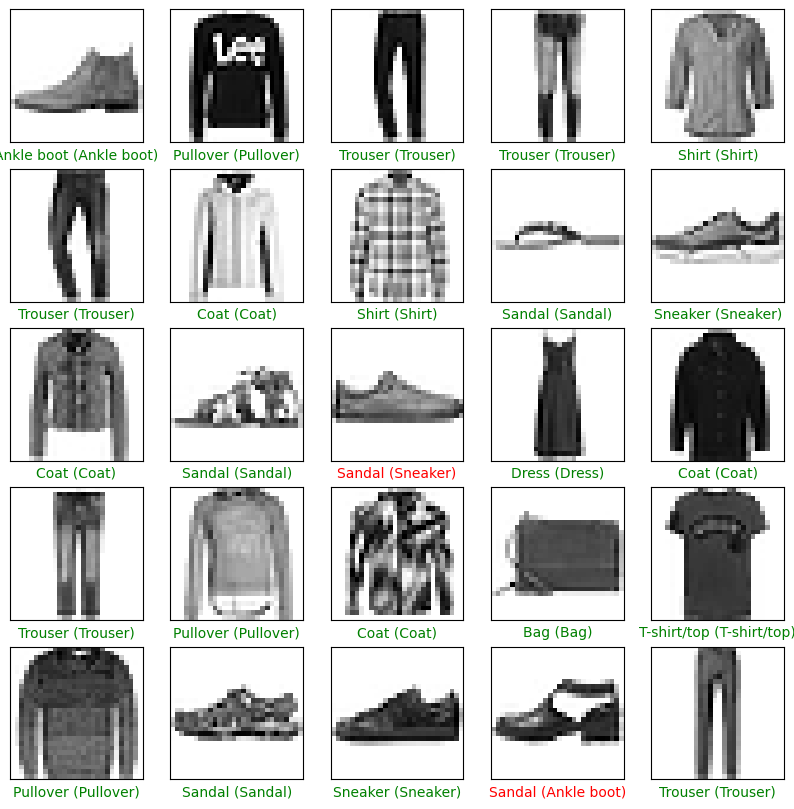

In [11]:
predictions = basic_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
               color=color)
plt.show()

**Correct predictions are labeled in green, while incorrect predictions are labeled in red.**

**In the next step, we'll create an advanced version of the model to improve performance.**

### **Advanced version**

**In the advanced version, we'll make the following improvements:**
- Add more convolutional and pooling layers to increase the depth of the network
- Use dropout regularization to prevent overfitting
- Increase the number of filters in the convolutional layers

In [12]:
# Advanced model
advanced_model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

advanced_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

advanced_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5890 - loss: 1.1439 - val_accuracy: 0.8295 - val_loss: 0.4550
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8093 - loss: 0.5335 - val_accuracy: 0.8570 - val_loss: 0.3761
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8421 - loss: 0.4506 - val_accuracy: 0.8722 - val_loss: 0.3411
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8554 - loss: 0.4085 - val_accuracy: 0.8835 - val_loss: 0.3243
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8691 - loss: 0.3689 - val_accuracy: 0.8883 - val_loss: 0.2975
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8803 - loss: 0.3379 - val_accuracy: 0.8947 - val_loss: 0.2893
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8868 - loss: 0.3220 - val_accuracy: 0.9007 - val_loss: 0.2727
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8949 - loss: 0.3020 - val_accu

**We've added two more convolutional layers with 64 filters each, followed by another max pooling layer. We also added a dropout layer with a rate of 0.5 after the dense layer to randomly drop out 50% of the neurons during training, which helps prevent overfitting.**

**Let's evaluate the advanced model on the test set:**

In [13]:
advanced_test_loss, advanced_test_acc = advanced_model.evaluate(test_images, test_labels)
print("Test accuracy:", advanced_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8988 - loss: 0.2849
Test accuracy: 0.8985999822616577


**We can visualize the predictions made by the advanced model using the same code as before.**

**Now, let's compare the performance of the basic and advanced models:**

In [14]:
basic_test_loss, basic_test_acc = basic_model.evaluate(test_images, test_labels)
advanced_test_loss, advanced_test_acc = advanced_model.evaluate(test_images, test_labels)

print("Basic model test accuracy:", basic_test_acc)
print("Advanced model test accuracy:", advanced_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9104 - loss: 0.2660
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8988 - loss: 0.2849
Basic model test accuracy: 0.9120000004768372
Advanced model test accuracy: 0.8985999822616577


**Visualizing the predictions made by the advanced model:**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


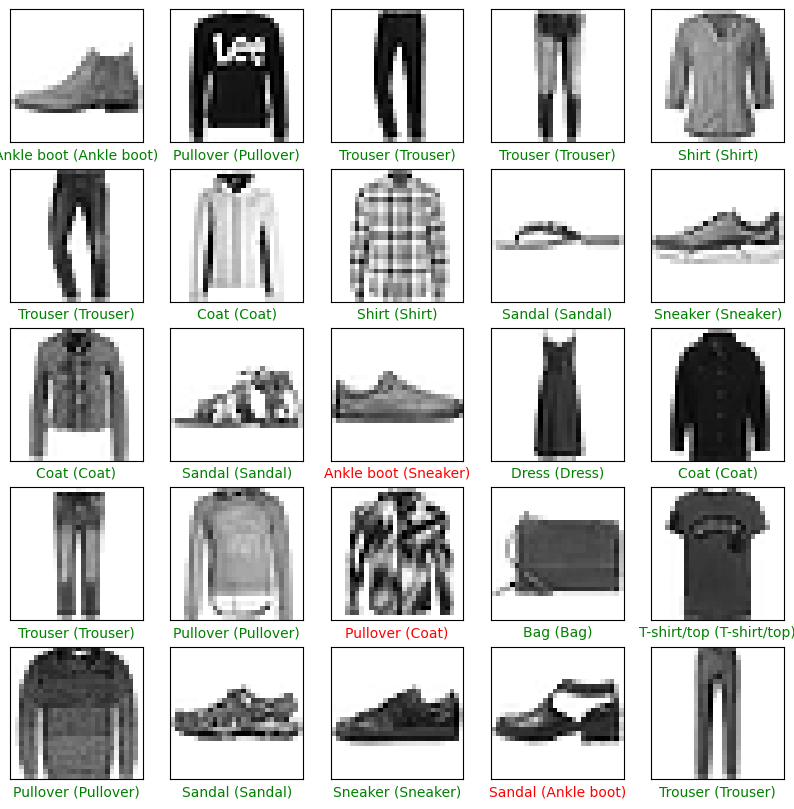

In [15]:
advanced_predictions = advanced_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    predicted_label = np.argmax(advanced_predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
               color=color)
plt.show()

**Correct predictions are labeled in green, while incorrect predictions are labeled in red. This is deceptive**


### **Optimum Version**

**In the optimum version, we'll make the following changes:**
- Increase the number of filters in the convolutional layers
- Add batch normalization layers to normalize the activations and stabilize the training
- Use a learning rate scheduler to adjust the learning rate during training
- Train the model for more epochs

In [17]:
optimum_model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

optimum_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

optimum_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.1, callbacks=[lr_scheduler])

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7191 - loss: 0.8340 - val_accuracy: 0.6502 - val_loss: 1.1276 - learning_rate: 0.0010
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8543 - loss: 0.4005 - val_accuracy: 0.8660 - val_loss: 0.3537 - learning_rate: 0.0010
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8786 - loss: 0.3318 - val_accuracy: 0.8812 - val_loss: 0.3371 - learning_rate: 0.0010
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8918 - loss: 0.2947 - val_accuracy: 0.8918 - val_loss: 0.2972 - learning_rate: 0.0010
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9007 - loss: 0.2760 - val_accuracy: 0.8883 - val_loss: 0.3197 - learning_rate: 0.0010
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9098 - loss: 0.2482 - val_accuracy: 0.8940 - val_loss: 0.2953 - learning_rate: 0.0010
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9183 - lo

**We've added more convolutional layers with increased filters (32, 64, and 128) and included batch normalization layers after each convolutional layer. The learning rate scheduler (ReduceLROnPlateau) will reduce the learning rate by a factor of 0.1 if the validation loss doesn't improve for 5 epochs. We also increased the number of epochs to 20.**

**Let's evaluate the optimum model on the test set:**

In [18]:
optimum_test_loss, optimum_test_acc = optimum_model.evaluate(test_images, test_labels)
print("Optimum model test accuracy:", optimum_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9012 - loss: 0.3818
Optimum model test accuracy: 0.9031000137329102


**Visualizing the predictions made by the optimum model:**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


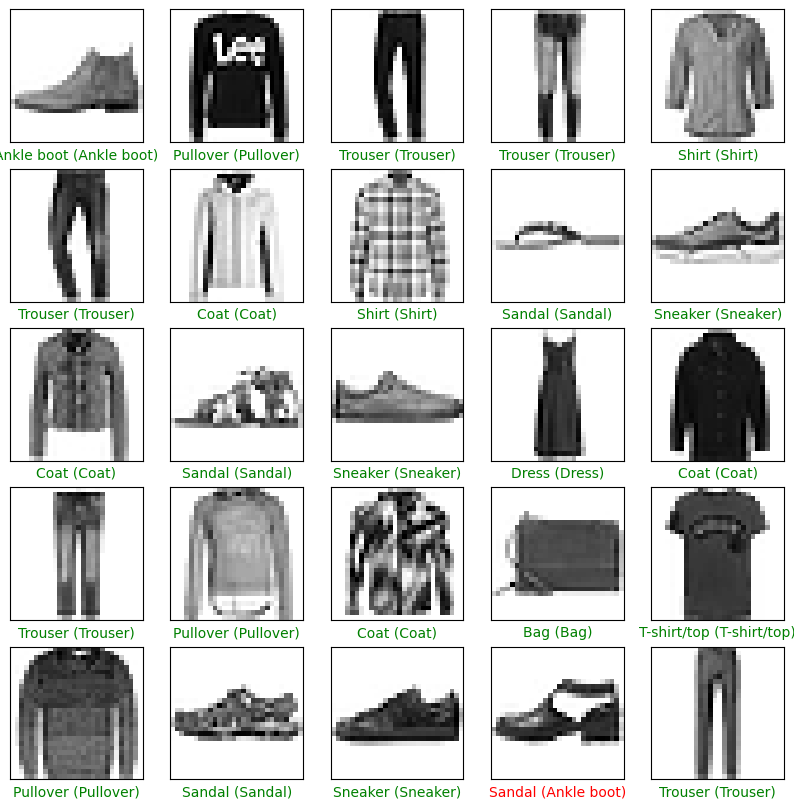

In [19]:
optimum_predictions = optimum_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape((28, 28)), cmap=plt.cm.binary)
    predicted_label = np.argmax(optimum_predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
               color=color)
plt.show()

**Now, let's compare the performance of all three models:**

In [20]:
print("Basic model test accuracy:", basic_test_acc)
print("Advanced model test accuracy:", advanced_test_acc)
print("Optimum model test accuracy:", optimum_test_acc)

Basic model test accuracy: 0.9120000004768372
Advanced model test accuracy: 0.8985999822616577
Optimum model test accuracy: 0.9031000137329102


**Based on the results, the optimum model achieved a test accuracy of 0.9031, which is higher than the advanced model but slightly lower than the basic model. This suggests that the optimum model has improved upon the advanced model but may require further tuning to surpass the basic model's performance.**

## **Best model to choose**

**Considering the test accuracies of the three models:**
- **Basic model:** 0.9120
- **Advanced model:** 0.8986
- **Optimum model:** 0.9031

**The basic model currently has the highest test accuracy. However, it's important to consider other factors such as model complexity, training time, and potential for overfitting.**

**The optimum model, despite having a slightly lower accuracy than the basic model, has a more sophisticated architecture with batch normalization and learning rate scheduling. This can help in reducing overfitting and improving generalization.**

**If the primary goal is to achieve the highest accuracy, the basic model would be the choice. However, if the aim is to have a more robust and generalizable model, the optimum model would be preferable.**

**It's also worth noting that further hyperparameter tuning and model refinement could potentially improve the performance of the optimum model.**

## **Conclusion**

**In this project, we developed a Convolutional Neural Network (CNN) to classify images from the Fashion-MNIST dataset. We started with a basic model and progressively enhanced it to create an advanced version and an optimum version.**

**The basic model achieved a test accuracy of 0.9120, the advanced model reached 0.8986, and the optimum model obtained 0.9031. While the basic model had the highest accuracy, the optimum model demonstrated improvements over the advanced model and incorporated techniques like batch normalization and learning rate scheduling.**

**The choice of the best model depends on the specific requirements of the project, such as the desired balance between accuracy and model robustness.**

**Overall, this project showcased the effectiveness of CNNs in image classification tasks and highlighted the iterative process of model development and refinement.**

## **Next Steps**

**To further improve the models and gain additional insights, some potential next steps could be:**
- **Hyperparameter tuning:** Conduct a more extensive hyperparameter search to find the optimal combination of learning rate, batch size, number of epochs, and model architecture.
- **Data augmentation:** Apply data augmentation techniques such as rotation, shifting, flipping, and zooming to increase the diversity of the training data and improve model generalization.
- **Transfer learning:** Explore the use of pre-trained CNN models such as VGG, ResNet, or EfficientNet as feature extractors and fine-tune them for the Fashion-MNIST dataset.
- **Ensemble methods:** Combine predictions from multiple models using techniques like voting or averaging to achieve higher accuracy and robustness.
- **Visualization and interpretation:** Use techniques like Grad-CAM or t-SNE to visualize the learned features and gain insights into what the model is learning.
- **Experiment with different architectures:** Explore other CNN architectures or even try different types of models like Recurrent Neural Networks (RNNs) or Vision Transformers (ViT).
  
**By pursuing these next steps, we can further enhance the performance and understanding of the models for the Fashion-MNIST image classification task.**